In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# Depression WGCI 的分析与可视化

In [2]:
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ujson
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='muted')

In [3]:
data_root = Path(r'../depression/result/')
file_name = rf'../configs/depression_no_overlap.json'
cfg = ujson.load(open(file_name, 'r'))
n_trial, n_dim, n_patient = cfg['trials'], 3, 69 # [1, 69]

In [4]:
# 读取患者标签
with open(data_root / r'patient_label.pkl' , 'rb') as instream:
    type_label = pickle.load(instream)

## 1.1 每个患者的trial分析

In [5]:
# 读取结果
with open(data_root/ rf'WGCI_persons.pkl', 'rb') as instream:
    WGCI_persons = pickle.load(instream)

In [6]:
WGCI_persons[1].shape

(3, 3, 3)

### 1.1.1 可视化分析

In [7]:
# 构造用户绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * n_trial * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID', 'trial_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_trial * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
plot_data['trial_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, cfg['trials'] + 1)] * 69).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(WGCI_persons[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim * n_trial))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [8]:
plot_data.tail(10)

,indexs,WGCI_values,patient_labels,patient_ID,trial_ID
1853,"(2, 2)",0.000000,high,69,2
1854,"(0, 0)",0.000000,high,69,3
1855,"(0, 1)",0.072575,high,69,3
1856,"(0, 2)",0.000000,high,69,3
1857,"(1, 0)",0.000000,high,69,3
1858,"(1, 1)",0.000000,high,69,3
1859,"(1, 2)",0.000000,high,69,3
1860,"(2, 0)",0.000000,high,69,3
1861,"(2, 1)",0.000000,high,69,3
1862,"(2, 2)",0.000000,high,69,3


In [9]:
for i in plot_data.columns:
    print(i, plot_data[i].unique())

indexs ['(0, 0)' '(0, 1)' '(0, 2)' '(1, 0)' '(1, 1)' '(1, 2)' '(2, 0)' '(2, 1)'
 '(2, 2)']
WGCI_values [0.00000000e+00 2.02279001e-01 4.72431004e-01 5.23150027e-01
 6.99802995e-01 6.01000013e-03 1.84961006e-01 1.24945000e-01
 1.48539999e-02 9.61299986e-02 8.60380009e-02 8.80910009e-02
 3.82977009e-01 7.23629966e-02 2.91709993e-02 2.14093998e-01
 8.90849978e-02 5.76580018e-02 3.06908995e-01 4.16750014e-02
 2.44405001e-01 9.17300023e-03 1.81273997e-01 2.36261994e-01
 1.58336997e-01 8.80299974e-03 1.12106003e-01 5.57623982e-01
 7.48902977e-01 6.81466997e-01 2.56200004e-02 3.46852005e-01
 1.33429999e-02 1.64369997e-02 4.07974005e-01 1.71765000e-01
 4.45641011e-01 1.19703002e-01 9.84859988e-02 3.93280014e-02
 8.53570029e-02 2.26444006e-01 7.18009993e-02 1.68201998e-01
 1.98061004e-01 1.67619996e-02 5.86250015e-02 1.24358997e-01
 2.53230989e-01 1.10296004e-01 3.23395997e-01 6.43289983e-02
 8.77240002e-02 3.98999006e-01 1.19204998e-01 4.39599995e-03
 2.62300000e-02 2.49429997e-02 2.48930007e-

In [10]:
# 保存数据
plot_data.to_csv(data_root/'plot_data_sta_persons.csv', encoding='utf-8')

1. **sns.boxenplot**

<Figure size 1296x576 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

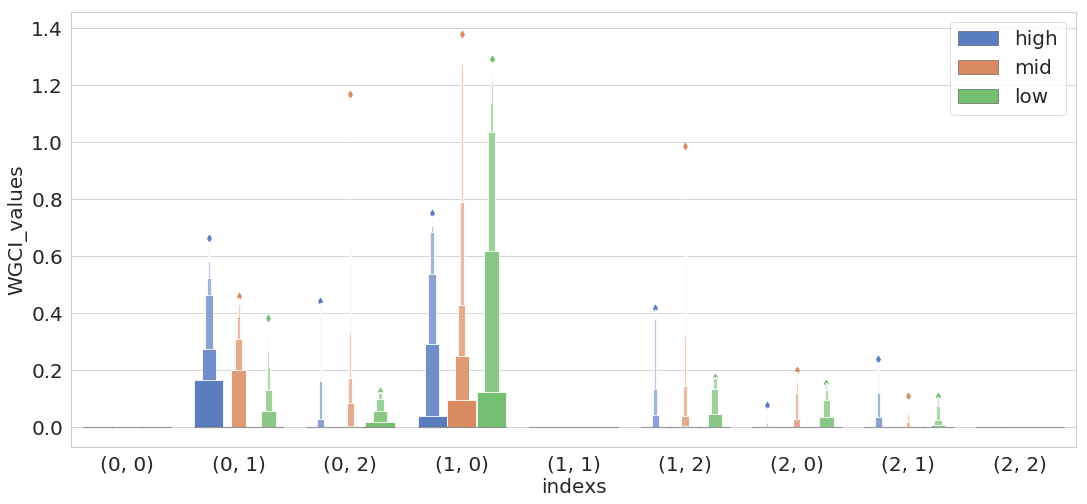

In [17]:
plt.figure(figsize=(18, 8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = sns.boxenplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置坐标标签字体大小
ax.set_xlabel('indexs', fontsize=20)
ax.set_ylabel('WGCI_values', fontsize=20)
# 设置图例字体大小
ax.legend(fontsize=20)

2. **sns.violinplot**

<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75]), <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

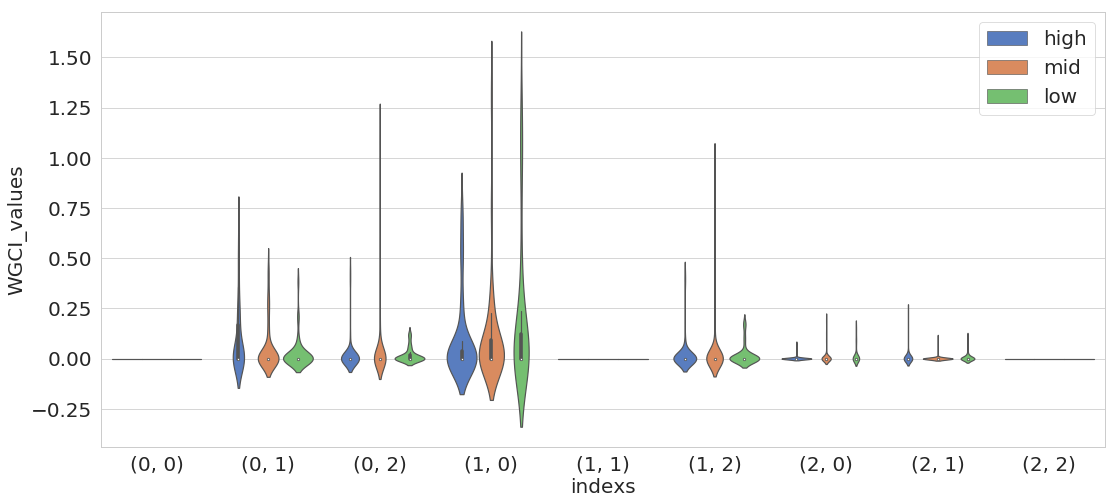

In [18]:
plt.figure(figsize=(18, 8))
ax = sns.violinplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置坐标标签字体大小
ax.set_xlabel('indexs', fontsize=20)
ax.set_ylabel('WGCI_values', fontsize=20)
# 设置图例字体大小
ax.legend(fontsize=20)

3. **sns.boxplot**

<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

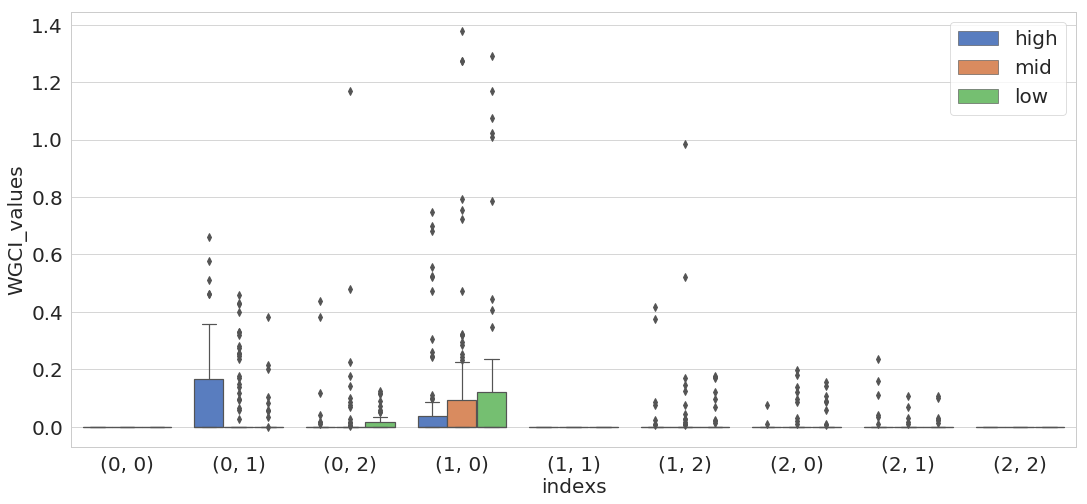

In [19]:
 plt.figure(figsize=(18, 8))
 ax = sns.boxplot(x='indexs', y='WGCI_values' , hue='patient_labels',data=plot_data)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置坐标标签字体大小
ax.set_xlabel('indexs', fontsize=20)
ax.set_ylabel('WGCI_values', fontsize=20)
# 设置图例字体大小
ax.legend(fontsize=20)

4. **sns.swarmplot**

In [162]:
# 数据太多，费时
#  plt.figure(figsize=(18, 10))
#  ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)

5. **sns.stripplot**

<Figure size 1296x720 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

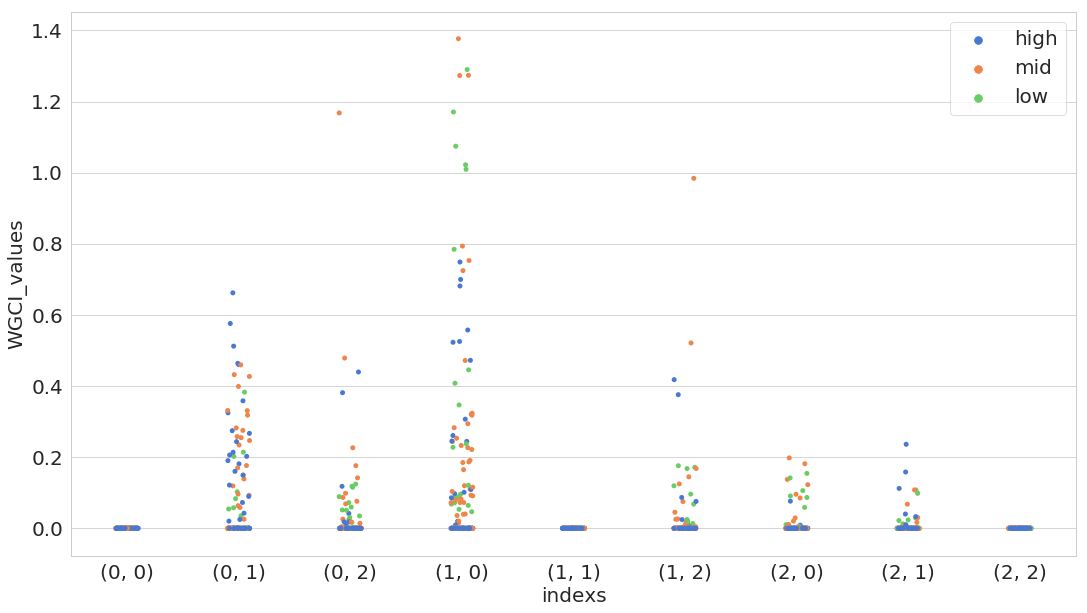

In [20]:
 plt.figure(figsize=(18, 10))
 ax = sns.stripplot(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# 设置坐标标签字体大小
ax.set_xlabel('indexs', fontsize=20)
ax.set_ylabel('WGCI_values', fontsize=20)
# 设置图例字体大小
ax.legend(fontsize=20)

## 1.2 各个患者的中值

In [21]:
# 读取结果
with open(data_root/ rf'WGCI_median_persons.pkl', 'rb') as instream:
    median_data = pickle.load(instream)  # 字典

### 读取分数信息

In [22]:
with open(data_root / r'scores.pkl' , 'rb') as instream:
    scores = pickle.load(instream)

### 添加分数信息

In [23]:
# 构造绘图的数据
# 按行排列
plot_data = pd.DataFrame(columns=['WGCI01','WGCI02','WGCI10','WGCI12','WGCI20',
                                  'WGCI21','patient_label', 'patient_ID', 'score'])
plot_data['patient_ID'] = pd.Series(np.array(range(1, 70)).reshape(-1,))
for id in range(1, 70):
    plot_data.loc[id - 1, 'WGCI01'] = median_data[id][0, 1]
    plot_data.loc[id - 1, 'WGCI02'] = median_data[id][0, 2]
    plot_data.loc[id - 1, 'WGCI10'] = median_data[id][1, 0]
    plot_data.loc[id - 1, 'WGCI12'] = median_data[id][1, 2]
    plot_data.loc[id - 1, 'WGCI20'] = median_data[id][2, 0]
    plot_data.loc[id - 1, 'WGCI21'] = median_data[id][2, 1]
    plot_data.loc[id - 1, 'patient_label'] = type_label[id]
    plot_data.loc[id - 1, 'score'] = scores[id]

In [24]:
plot_data.tail()

,WGCI01,WGCI02,WGCI10,WGCI12,WGCI20,WGCI21,patient_label,patient_ID,score
64,0,0,0,0,0,0,high,65,19
65,0,0,0.08575,0,0,0,high,66,19
66,0,0,0,0,0,0,high,67,24
67,0.575964,0,0,0,0,0,high,68,24
68,0.149367,0,0,0,0,0,high,69,24


In [25]:
plot_data.sort_values('score', inplace=True)  # 按分数排序
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_median_sort.csv', encoding='utf-8')

In [26]:
plot_data.tail()

,WGCI01,WGCI02,WGCI10,WGCI12,WGCI20,WGCI21,patient_label,patient_ID,score
57,0.267011,0,0,0,0,0,high,58,23
67,0.575964,0,0,0,0,0,high,68,24
25,0.274461,0,0,0,0,0,high,26,24
66,0,0,0,0,0,0,high,67,24
68,0.149367,0,0,0,0,0,high,69,24


In [27]:
plot_data

,WGCI01,WGCI02,WGCI10,WGCI12,WGCI20,WGCI21,patient_label,patient_ID,score
5,0,0,0,0,0,0,low,6,0
9,0,0,0.407974,0.013343,0,0,low,10,0
18,0.000607,0.030421,0.046544,0.024893,0.010567,0.012416,low,19,0
49,0,0,0,0,0,0,low,50,2
30,0,0,1.00956,0,0,0,low,31,3
12,0,0,0,0,0,0,low,13,3
28,0,0,0,0,0,0,low,29,4
2,0,0,0.088091,0,0,0,low,3,4
3,0.214094,0.072363,0,0,0,0,low,4,4
48,0,0,0.227729,0.01906,0,0,low,49,5


<Figure size 864x576 with 0 Axes>

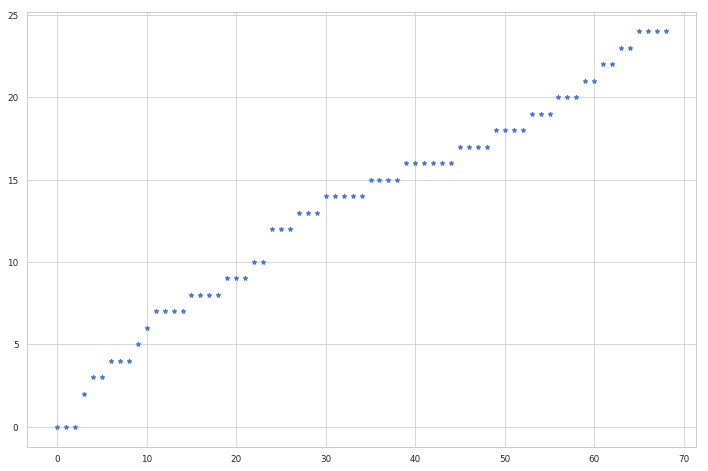

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['score'].values, '*')

<Figure size 864x576 with 0 Axes>

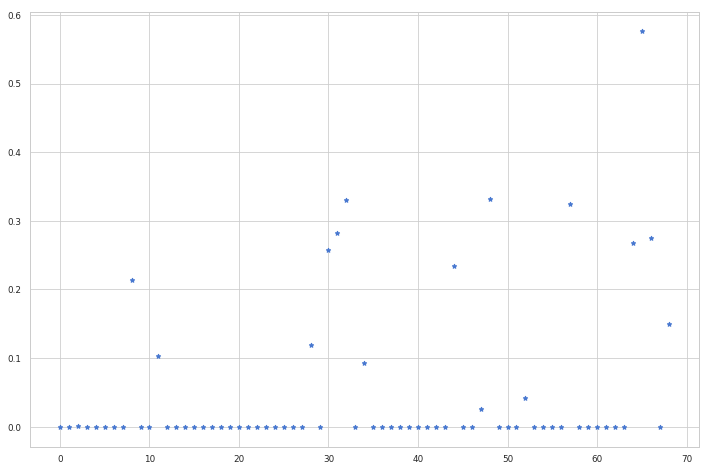

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI01'].values, '*')

<Figure size 864x576 with 0 Axes>

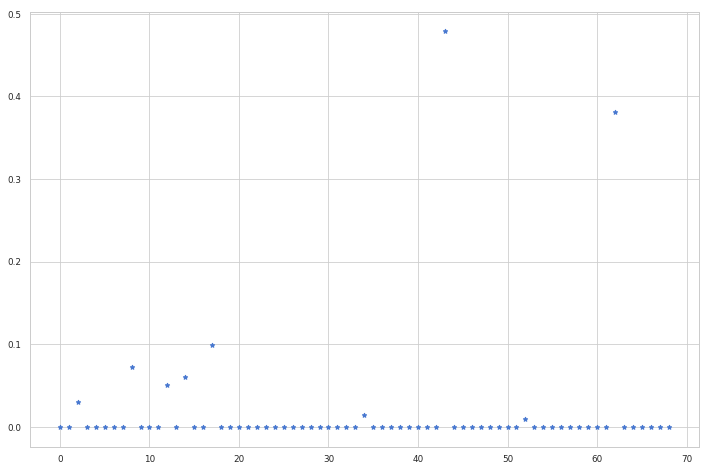

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI02'].values, '*')

<Figure size 864x576 with 0 Axes>

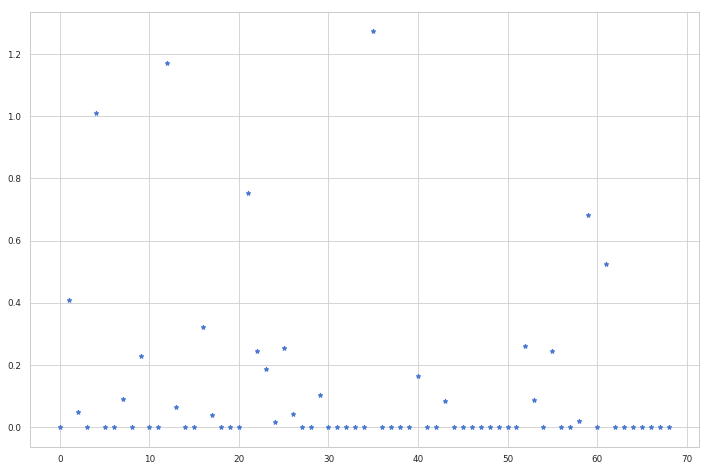

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI10'].values, '*')

<Figure size 864x576 with 0 Axes>

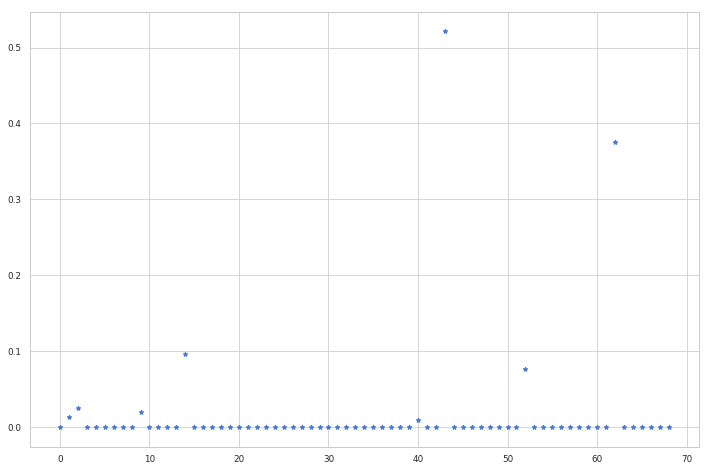

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI12'].values, '*')

<Figure size 864x576 with 0 Axes>

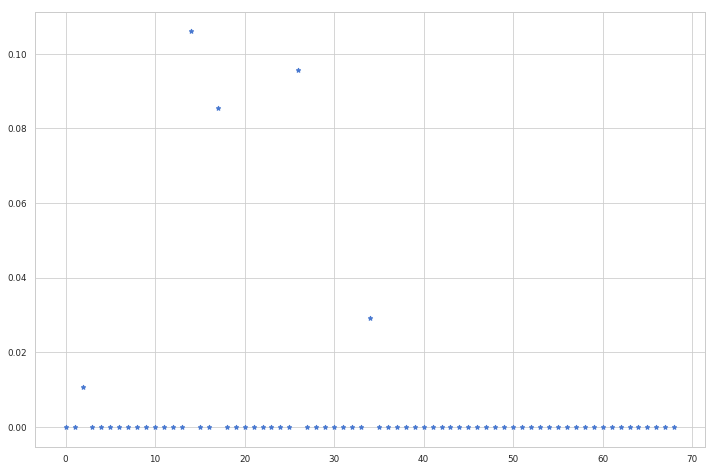

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI20'].values, '*')

<Figure size 864x576 with 0 Axes>

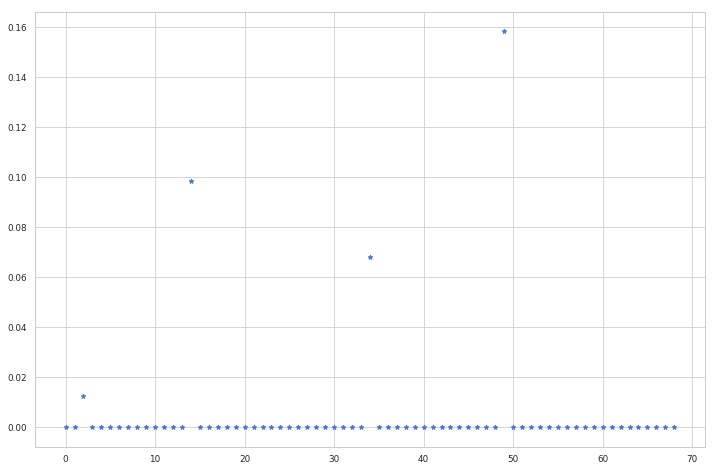

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI21'].values, '*')

In [35]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(median_data[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [36]:
plot_data.tail(18)
plot_data.shape

,indexs,WGCI_values,patient_labels,patient_ID
603,"(0, 0)",0.000000,high,68
604,"(0, 1)",0.575964,high,68
605,"(0, 2)",0.000000,high,68
606,"(1, 0)",0.000000,high,68
607,"(1, 1)",0.000000,high,68
608,"(1, 2)",0.000000,high,68
609,"(2, 0)",0.000000,high,68
610,"(2, 1)",0.000000,high,68
611,"(2, 2)",0.000000,high,68
612,"(0, 0)",0.000000,high,69


(621, 4)

In [37]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_median_persons.csv', encoding='utf-8')

In [38]:
# 只显示 (0, 1), (1, 0)
idx = np.logical_or(plot_data.indexs=='(0, 1)', plot_data.indexs=='(1, 0)')
plot_data1 = plot_data[idx]
plot_data1.tail()

,indexs,WGCI_values,patient_labels,patient_ID
597,"(1, 0)",0.000000,high,67
604,"(0, 1)",0.575964,high,68
606,"(1, 0)",0.000000,high,68
613,"(0, 1)",0.149367,high,69
615,"(1, 0)",0.000000,high,69


In [39]:
# save1 = plot_data1.sort_values('patient_labels')
plot_data1.to_csv(data_root/'sta_median_persons2.csv', encoding='utf-8')

### 1.2.1 可视化分析
1. `sns.boxenplot`
2. `sns.violinplot`
3. `sns.boxplot`
4. `sns.swarmplot`
5. `sns.stripplot`

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

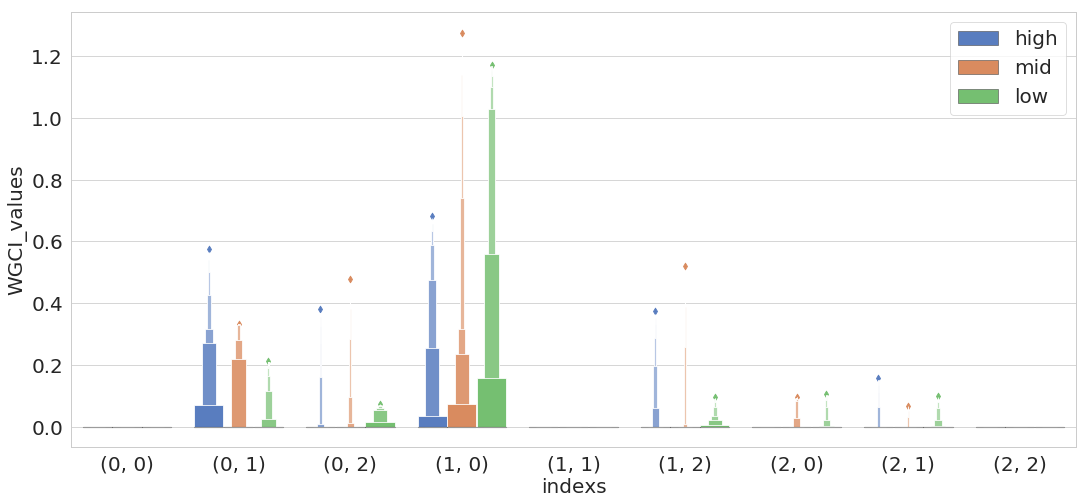

plot_type:  violinplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

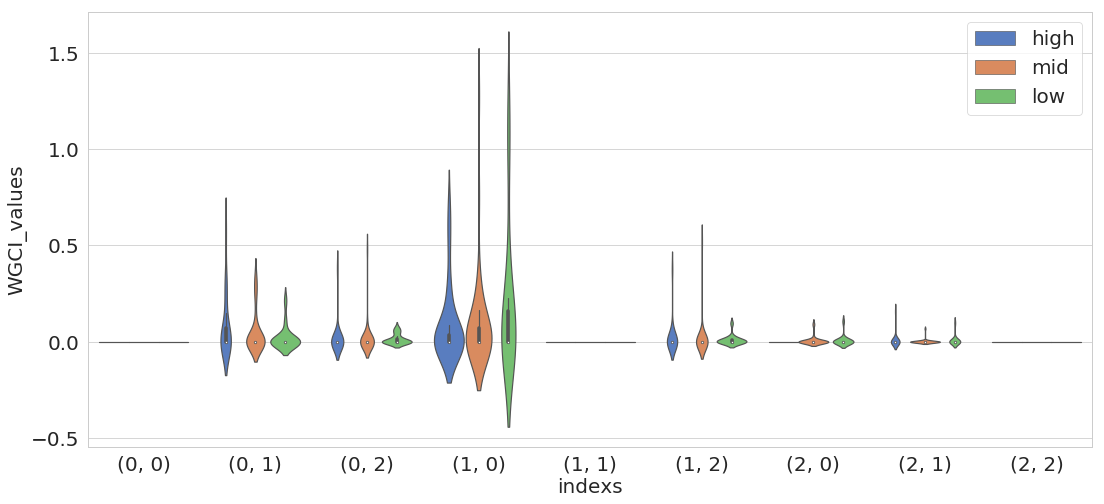

plot_type:  boxplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

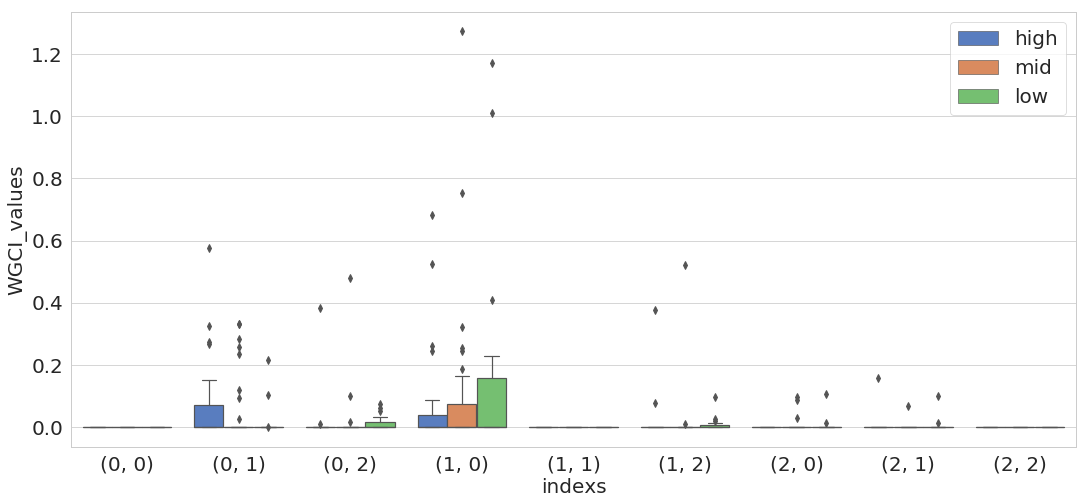

plot_type:  swarmplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

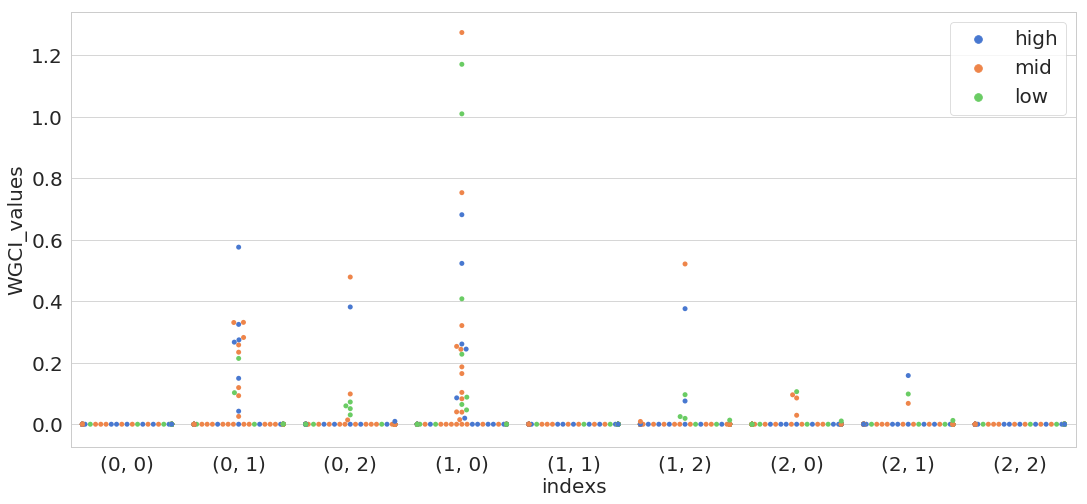

plot_type:  stripplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

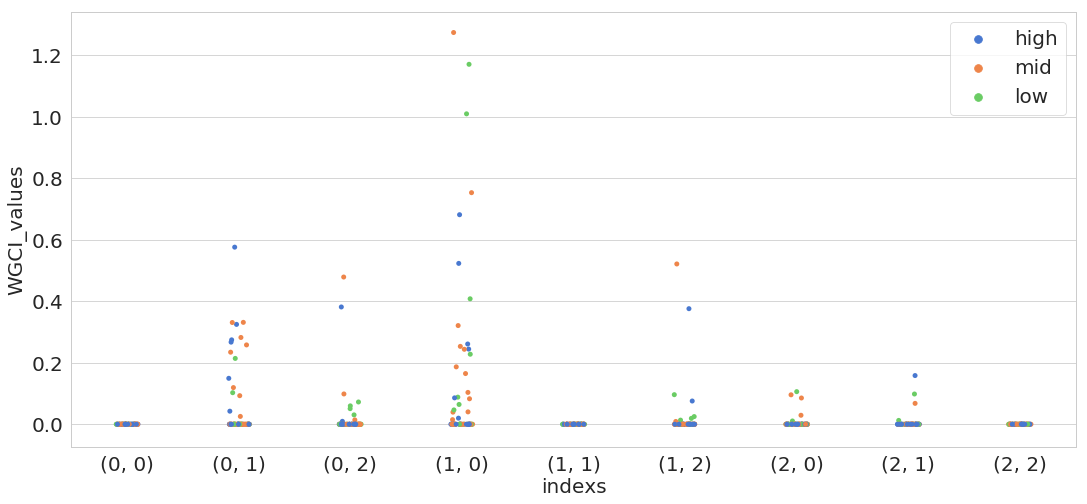

In [40]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax.set_xlabel('indexs', fontsize=20)
    ax.set_ylabel('WGCI_values', fontsize=20)
    # 设置图例字体大小
    ax.legend(fontsize=20)
    plt.show()

## 1.3 各个患者的均值

In [41]:
# 读取结果
with open(data_root / r'WGCI_mean_persons.pkl' , 'rb') as instream:
    mean_data = pickle.load(instream)

In [42]:
# 构造绘图的数据
# 按行排列
plot_data = pd.DataFrame(columns=['WGCI01','WGCI02','WGCI10','WGCI12','WGCI20',
                                  'WGCI21','patient_label', 'patient_ID', 'score'])
plot_data['patient_ID'] = pd.Series(np.array(range(1, 70)).reshape(-1,))
for id in range(1, 70):
    plot_data.loc[id - 1, 'WGCI01'] = median_data[id][0, 1]
    plot_data.loc[id - 1, 'WGCI02'] = median_data[id][0, 2]
    plot_data.loc[id - 1, 'WGCI10'] = median_data[id][1, 0]
    plot_data.loc[id - 1, 'WGCI12'] = median_data[id][1, 2]
    plot_data.loc[id - 1, 'WGCI20'] = median_data[id][2, 0]
    plot_data.loc[id - 1, 'WGCI21'] = median_data[id][2, 1]
    plot_data.loc[id - 1, 'patient_label'] = type_label[id]
    plot_data.loc[id - 1, 'score'] = scores[id]

In [43]:
plot_data.sort_values('score', inplace=True)  # 按分数排序
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_mean_sort.csv', encoding='utf-8')

In [44]:
plot_data

,WGCI01,WGCI02,WGCI10,WGCI12,WGCI20,WGCI21,patient_label,patient_ID,score
5,0,0,0,0,0,0,low,6,0
9,0,0,0.407974,0.013343,0,0,low,10,0
18,0.000607,0.030421,0.046544,0.024893,0.010567,0.012416,low,19,0
49,0,0,0,0,0,0,low,50,2
30,0,0,1.00956,0,0,0,low,31,3
12,0,0,0,0,0,0,low,13,3
28,0,0,0,0,0,0,low,29,4
2,0,0,0.088091,0,0,0,low,3,4
3,0.214094,0.072363,0,0,0,0,low,4,4
48,0,0,0.227729,0.01906,0,0,low,49,5


<Figure size 864x576 with 0 Axes>

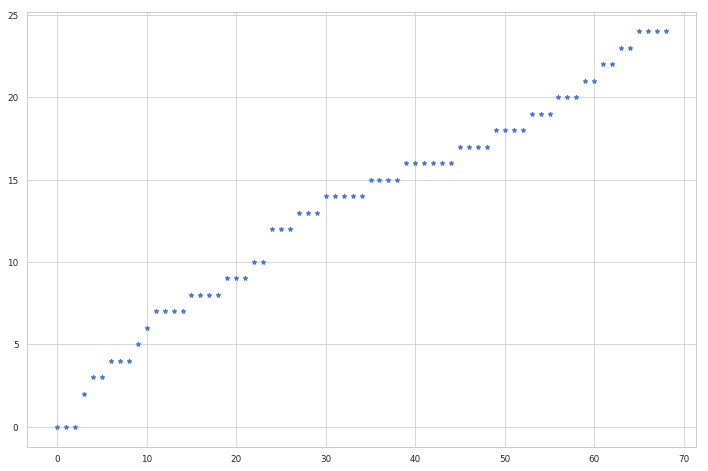

In [45]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['score'].values, '*')

<Figure size 864x576 with 0 Axes>

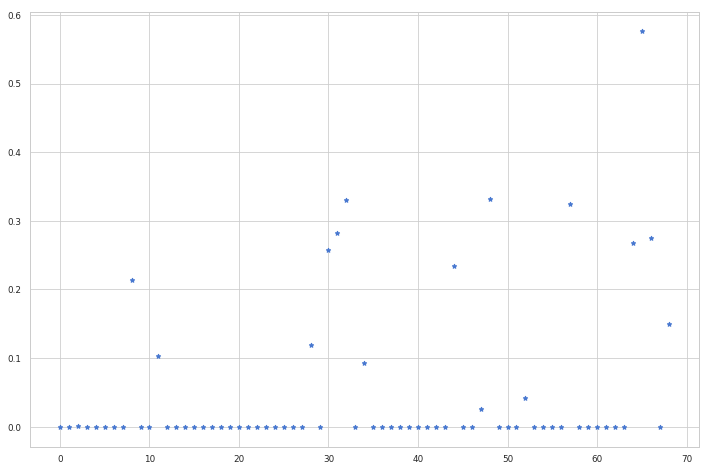

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI01'].values, '*')

<Figure size 864x576 with 0 Axes>

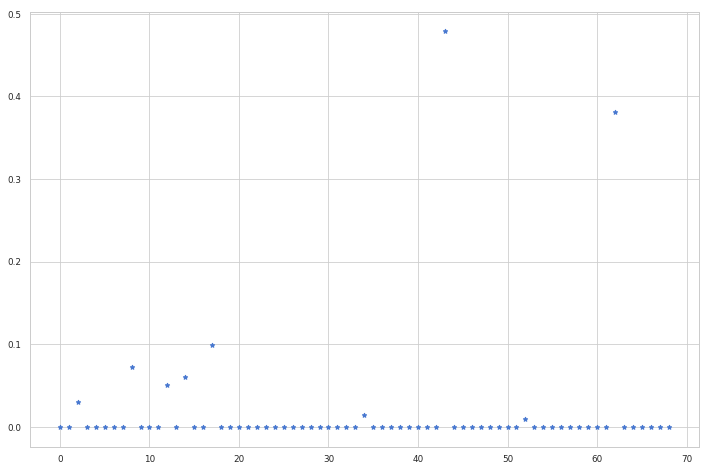

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI02'].values, '*')

<Figure size 864x576 with 0 Axes>

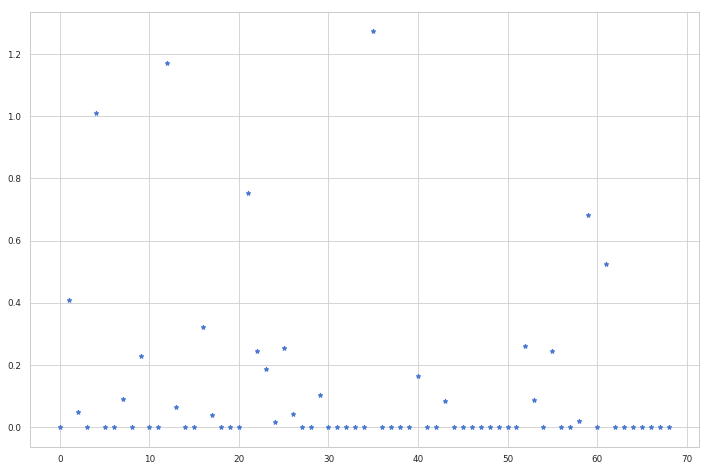

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI10'].values, '*')

<Figure size 864x576 with 0 Axes>

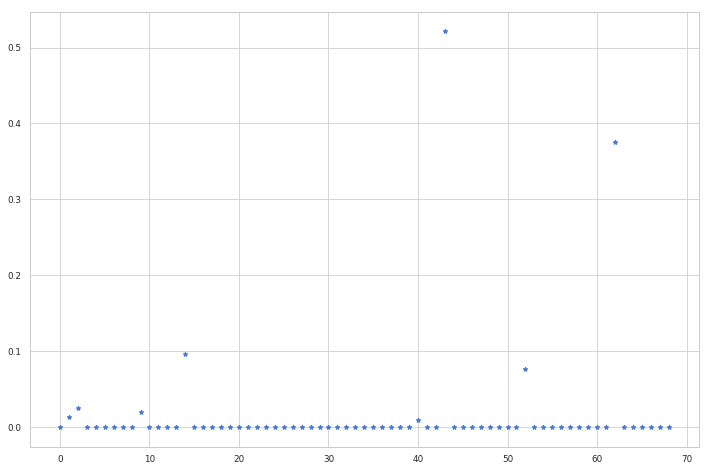

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI12'].values, '*')

<Figure size 864x576 with 0 Axes>

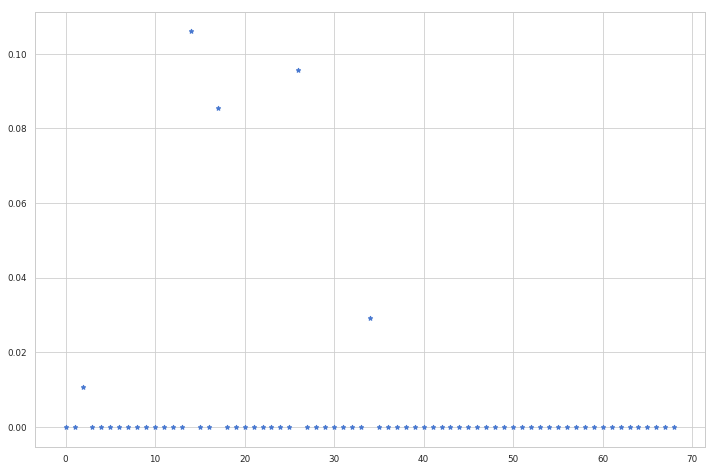

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI20'].values, '*')

<Figure size 864x576 with 0 Axes>

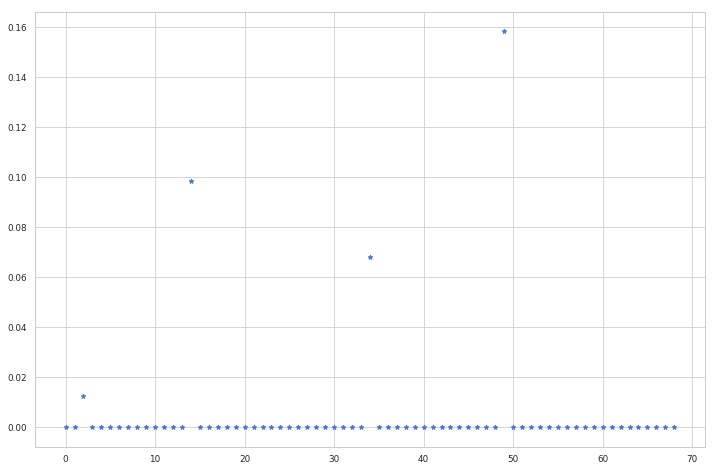

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(plot_data['WGCI21'].values, '*')

In [52]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(mean_data[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

In [53]:
plot_data.tail(18)
plot_data

,indexs,WGCI_values,patient_labels,patient_ID
603,"(0, 0)",0.000000,high,68
604,"(0, 1)",0.583485,high,68
605,"(0, 2)",0.000000,high,68
606,"(1, 0)",0.000000,high,68
607,"(1, 1)",0.000000,high,68
608,"(1, 2)",0.000000,high,68
609,"(2, 0)",0.000000,high,68
610,"(2, 1)",0.000000,high,68
611,"(2, 2)",0.000000,high,68
612,"(0, 0)",0.000000,high,69


,indexs,WGCI_values,patient_labels,patient_ID
0,"(0, 0)",0.000000,high,1
1,"(0, 1)",0.067426,high,1
2,"(0, 2)",0.000000,high,1
3,"(1, 0)",0.565128,high,1
4,"(1, 1)",0.000000,high,1
5,"(1, 2)",0.002003,high,1
6,"(2, 0)",0.000000,high,1
7,"(2, 1)",0.000000,high,1
8,"(2, 2)",0.000000,high,1
9,"(0, 0)",0.000000,mid,2


In [54]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_mean_persons.csv', encoding='utf-8')

In [55]:
# 只显示 (0, 1), (1, 0)
idx = np.logical_or(plot_data.indexs=='(0, 1)', plot_data.indexs=='(1, 0)')
plot_data1 = plot_data[idx]
plot_data1.tail()

,indexs,WGCI_values,patient_labels,patient_ID
597,"(1, 0)",0.000000,high,67
604,"(0, 1)",0.583485,high,68
606,"(1, 0)",0.000000,high,68
613,"(0, 1)",0.145272,high,69
615,"(1, 0)",0.000000,high,69


In [56]:
# save1 = plot_data1.sort_values('patient_labels')
plot_data1.to_csv(data_root/'sta_mean_persons2.csv', encoding='utf-8')

### 1.3.1 可视化分析
1. `sns.boxenplot`
2. `sns.violinplot`
3. `sns.boxplot`
4. `sns.swarmplot`
5. `sns.stripplot`

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

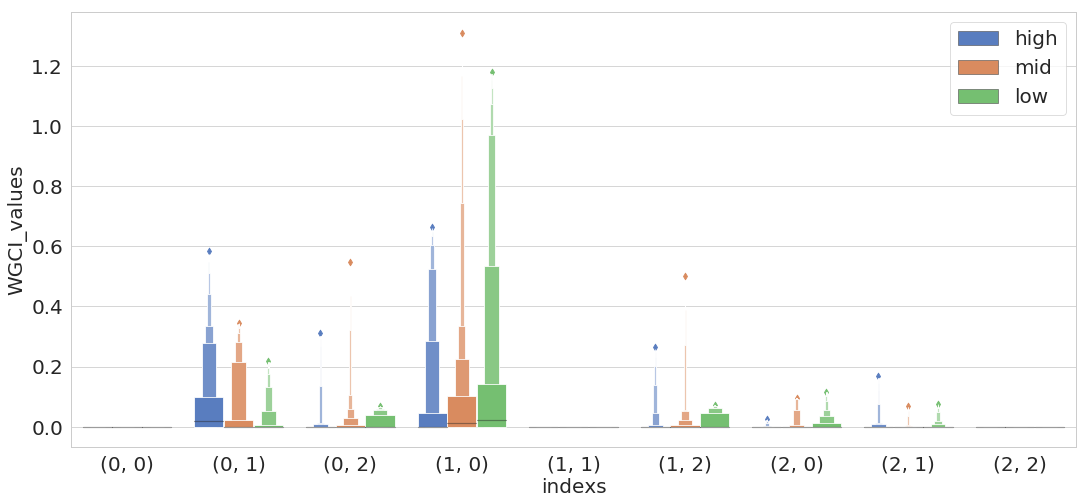

plot_type:  violinplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,
         1.5 ,  1.75]), <a list of 11 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

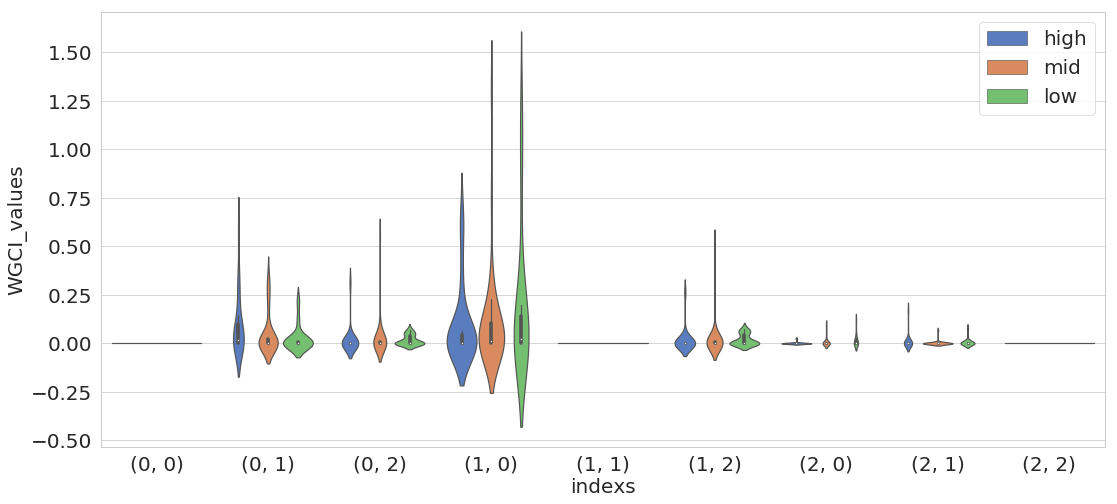

plot_type:  boxplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

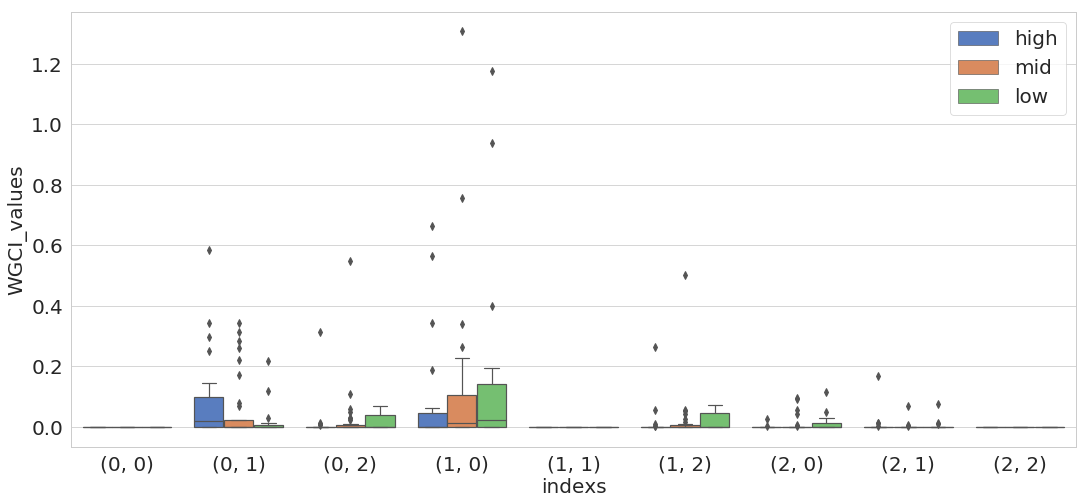

plot_type:  swarmplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

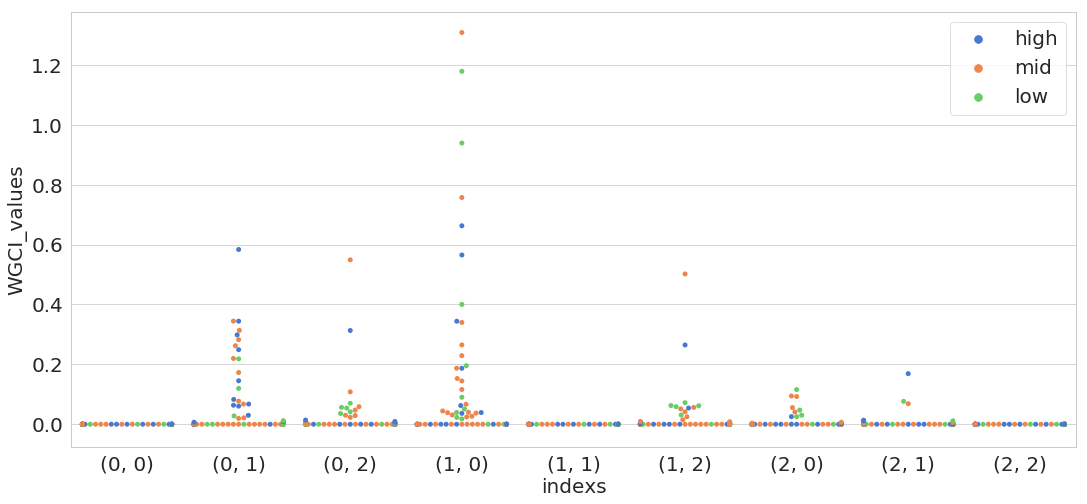

plot_type:  stripplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 9 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

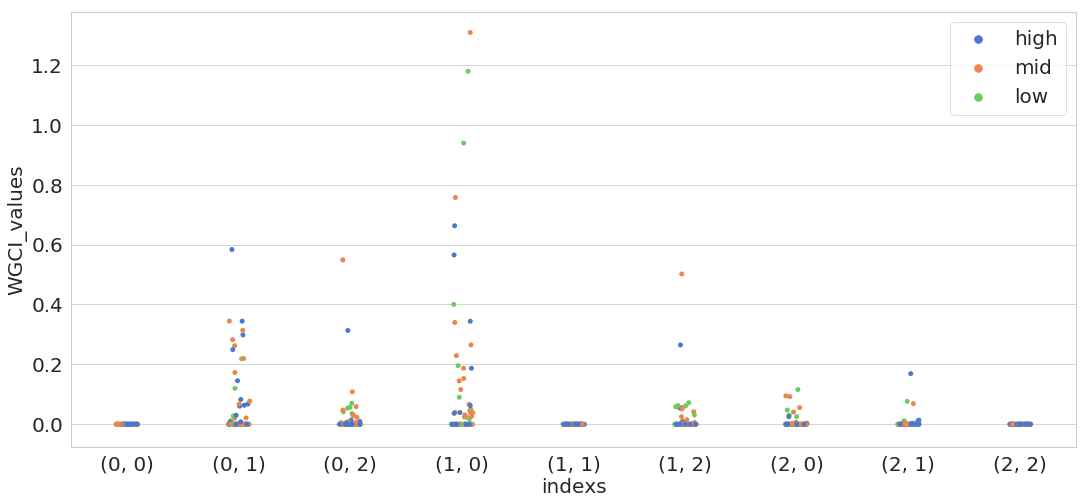

In [57]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax.set_xlabel('indexs', fontsize=20)
    ax.set_ylabel('WGCI_values', fontsize=20)
    # 设置图例字体大小
    ax.legend(fontsize=20)
    plt.show()

## 1.4 各个患者的最大值
我们暂时认为正常人的连通性为0，出现连通性代表抑郁症的出现，取最大值代表最能代表当前患者发病状态

In [77]:
# 读取结果
with open(data_root / r'WGCI_max_persons.pkl' , 'rb') as instream:
    max_data = pickle.load(instream)
with open(data_root / r'scores_persons.pkl' , 'rb') as instream:
    scores = pickle.load(instream)

In [78]:
# 构造绘图的数据
# 按行排列
plot_data = pd.DataFrame(columns=['WGCI01','WGCI02','WGCI10','WGCI12','WGCI20',
                                  'WGCI21','patient_label', 'patient_ID', 'score'])
plot_data['patient_ID'] = pd.Series(np.array(range(1, 70)).reshape(-1,))
for id in range(1, 70):
    plot_data.loc[id - 1, 'WGCI01'] = max_data[id][0, 1]
    plot_data.loc[id - 1, 'WGCI02'] = max_data[id][0, 2]
    plot_data.loc[id - 1, 'WGCI10'] = max_data[id][1, 0]
    plot_data.loc[id - 1, 'WGCI12'] = max_data[id][1, 2]
    plot_data.loc[id - 1, 'WGCI20'] = max_data[id][2, 0]
    plot_data.loc[id - 1, 'WGCI21'] = max_data[id][2, 1]
    plot_data.loc[id - 1, 'patient_label'] = type_label[id]
    plot_data.loc[id - 1, 'score'] = scores[id]

In [80]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax.set_xlabel('indexs', fontsize=20)
    ax.set_ylabel('WGCI_values', fontsize=20)
    # 设置图例字体大小
    ax.legend(fontsize=20)
    plt.show()

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

ValueError: Could not interpret input 'indexs'

<Figure size 1296x576 with 0 Axes>

In [81]:
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 69  # 患者数
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_labels', 'patient_ID'])
plot_data['indexs'] = pd.Series(x_axis)
plot_data['patient_ID'] = pd.Series(np.array([[x] * n_dim * n_dim for x in range(1, 70)]).reshape(-1,))
v1, v2 = [], []
for id in range(1, 70):
    v1.append(max_data[id].reshape(-1,))
    v2.append(([type_label[id]] * n_dim * n_dim))
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_labels'] = pd.Series(np.array(v2).reshape(-1,))

plot_type:  boxenplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

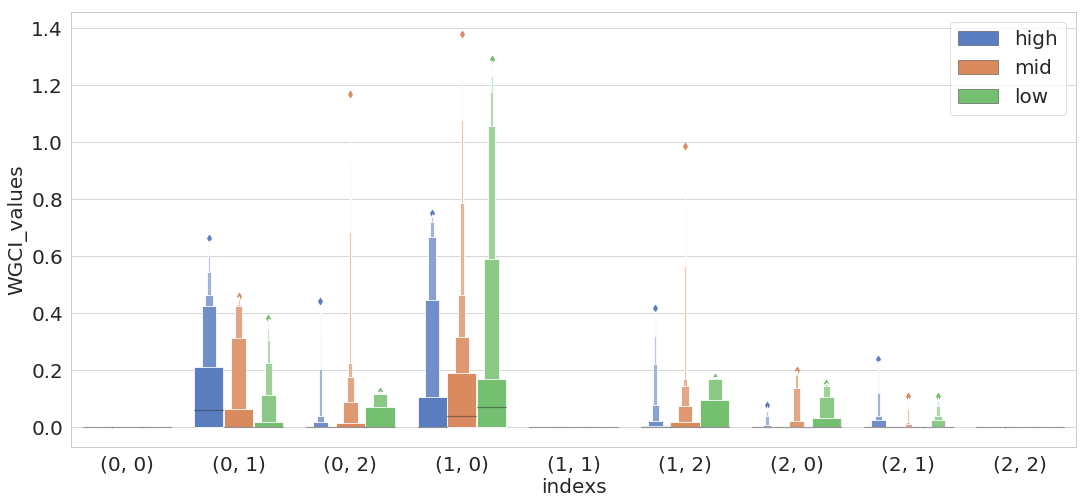

plot_type:  violinplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

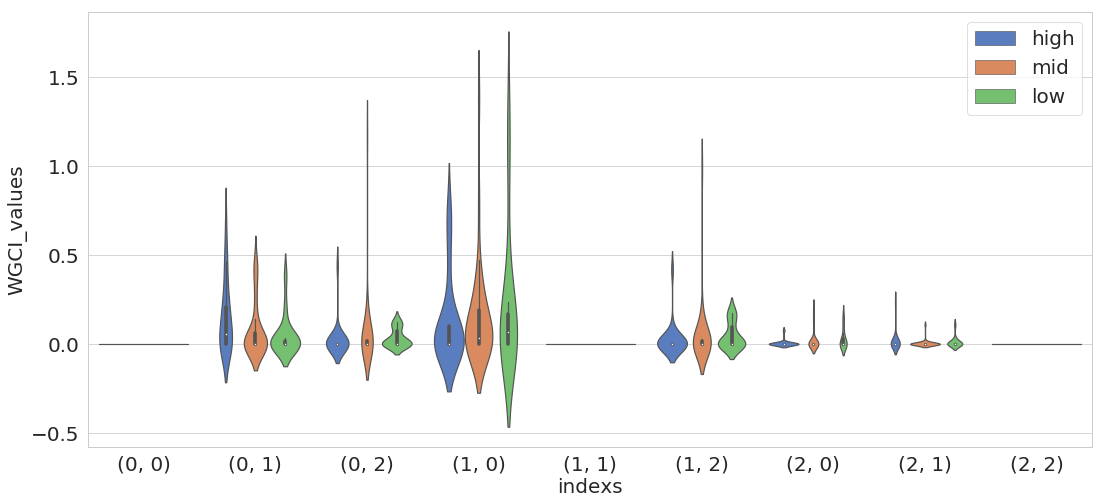

plot_type:  boxplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

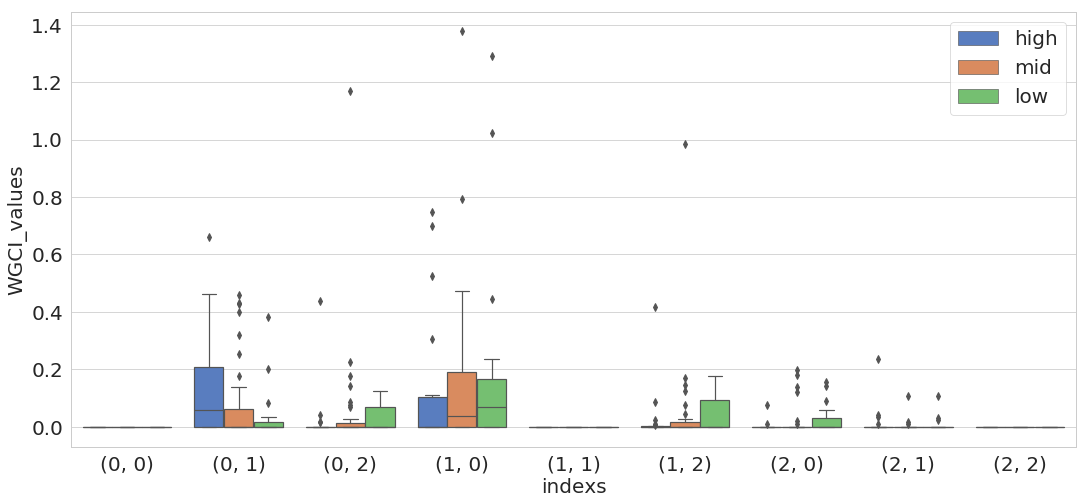

plot_type:  swarmplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

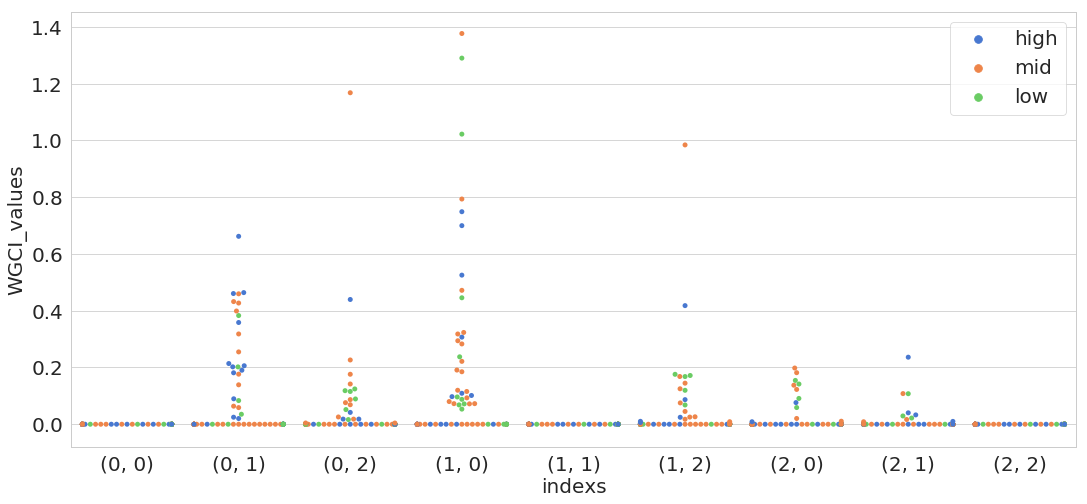

plot_type:  stripplot


<Figure size 1296x576 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text yticklabel objects>)

Text(0.5,0,'indexs')

Text(0,0.5,'WGCI_values')

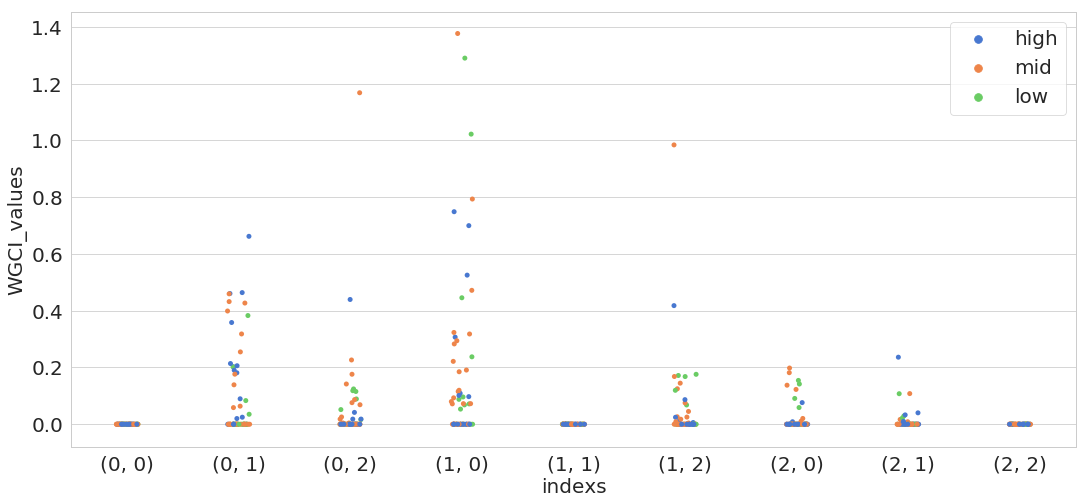

In [82]:
plot_type = ['boxenplot', 'violinplot', 'boxplot', 'swarmplot', 'stripplot']
for item in plot_type:
    print('plot_type: ', item)
    plt.figure(figsize=(18, 8))
    ax = getattr(sns, item)(x='indexs', y='WGCI_values', hue='patient_labels', data=plot_data)
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # 设置坐标标签字体大小
    ax.set_xlabel('indexs', fontsize=20)
    ax.set_ylabel('WGCI_values', fontsize=20)
    # 设置图例字体大小
    ax.legend(fontsize=20)
    plt.show()

## 1.4 每种类型的患者分析

### 1.4.1 中值分析

In [60]:
# 读取结果
with open(data_root / r'WGCI_median_type_persons.pkl' , 'rb') as instream:
    median_type_data = pickle.load(instream)

In [61]:
median_type_data

{'low': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'mid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'high': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])}

In [62]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 3  # 3 种类型的患者
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_type'])
plot_data['indexs'] = pd.Series(x_axis)
v1, v2 = [], []
for id in ['low', 'mid', 'high']:
    v1.append(median_type_data[id].reshape(-1,))
    v2.append([id] * n_dim * n_dim)
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_type'] = pd.Series(np.array(v2).reshape(-1,))

In [63]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_median_type_persons.csv', encoding='utf-8')

### 可视化分析

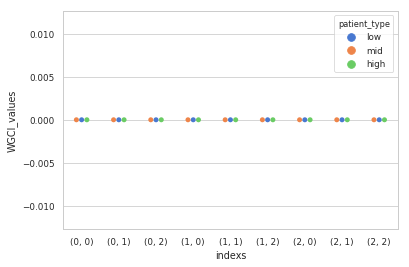

In [66]:
ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_type', data=plot_data)


### 读取分数信息

In [67]:
with open(data_root / r'scores_persons.pkl' , 'rb') as instream:
    scores = pickle.load(instream)

### 1.4.2 均值分析

In [68]:
# 读取结果
with open(data_root / r'WGCI_mean_type_persons.pkl' , 'rb') as instream:
    mean_type_data = pickle.load(instream)

In [69]:
mean_type_data

{'low': array([[0.        , 0.02517278, 0.01751431],
        [0.19557033, 0.        , 0.01903556],
        [0.01455476, 0.00650676, 0.        ]]),
 'mid': array([[0.        , 0.05236047, 0.02536776],
        [0.11197392, 0.        , 0.02112863],
        [0.00863801, 0.00226834, 0.        ]]),
 'high': array([[0.        , 0.09696098, 0.01710647],
        [0.09481322, 0.        , 0.01661258],
        [0.00141772, 0.0098298 , 0.        ]])}

In [70]:
# 构造绘图的数据
x_axis = [str((row, col)) for row in range(n_dim) for col in range(n_dim)] * 3  # 3 种类型的患者
plot_data = pd.DataFrame(columns=['indexs', 'WGCI_values', 'patient_type'])
plot_data['indexs'] = pd.Series(x_axis)
v1, v2 = [], []
for id in ['low', 'mid', 'high']:
    v1.append(mean_type_data[id].reshape(-1,))
    v2.append([id] * n_dim * n_dim)
plot_data['WGCI_values'] = pd.Series(np.array(v1).reshape(-1,))
plot_data['patient_type'] = pd.Series(np.array(v2).reshape(-1,))

In [71]:
plot_data

,indexs,WGCI_values,patient_type
0,"(0, 0)",0.000000,low
1,"(0, 1)",0.025173,low
2,"(0, 2)",0.017514,low
3,"(1, 0)",0.195570,low
4,"(1, 1)",0.000000,low
5,"(1, 2)",0.019036,low
6,"(2, 0)",0.014555,low
7,"(2, 1)",0.006507,low
8,"(2, 2)",0.000000,low
9,"(0, 0)",0.000000,mid


In [72]:
# 保存绘图数据
plot_data.to_csv(data_root/'plot_data_sta_mean_type_persons.csv', encoding='utf-8')

In [73]:
# 只显示 (0, 1), (1, 0)
idx = np.logical_or(plot_data.indexs=='(0, 1)', plot_data.indexs=='(1, 0)')
plot_data1 = plot_data[idx]
plot_data1.tail()

,indexs,WGCI_values,patient_type
3,"(1, 0)",0.195570,low
10,"(0, 1)",0.052360,mid
12,"(1, 0)",0.111974,mid
19,"(0, 1)",0.096961,high
21,"(1, 0)",0.094813,high


In [74]:
# save1 = plot_data1.sort_values('patient_labels')
plot_data1.to_csv(data_root/'sta_mean_type_persons2.csv', encoding='utf-8')

### 可视化分析

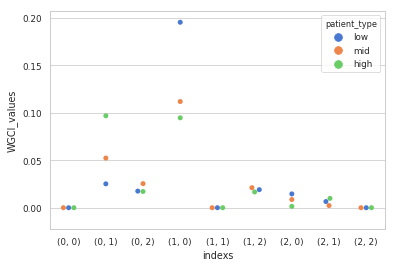

In [75]:
ax = sns.swarmplot(x='indexs', y='WGCI_values', hue='patient_type', data=plot_data)

## 1.4 网络可视化
1. [Weighted Graph](https://networkx.github.io/documentation/latest/auto_examples/drawing/plot_weighted_graph.html#sphx-glr-auto-examples-drawing-plot-weighted-graph-py)

In [76]:
import networkx as nx

ModuleNotFoundError: No module named 'networkx'

### 1.4.1 中值网络

In [142]:
# 读取结果
with open(data_root / r'WGCI_median_type_persons.pkl' , 'rb') as instream:
    median_type_data = pickle.load(instream)

In [143]:
median_type_data

{'low': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'mid': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), 'high': array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])}

In [144]:
def make_graph(data):
    G = nx.Graph()
    for x in ['ch1', 'ch2', 'ch3']:
        G.add_node(x, node_size=5000)
    n_ch = data.shape[0]
    for row in range(n_ch):
        for col in range(n_ch):
            if data[row, col] > 1e-5:
                G.add_edge(f'ch{row + 1}', f'ch{col + 1}', weight=data[row, col])
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.005]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.005]

    pos = nx.spring_layout(G)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(G, pos, edgelist=esmall,
                           width=6, alpha=0.5, edge_color='b', style='dashed')

    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

    plt.axis('off')
    plt.show()

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


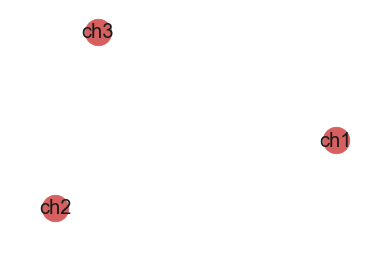

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


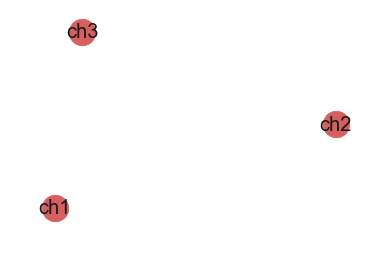

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


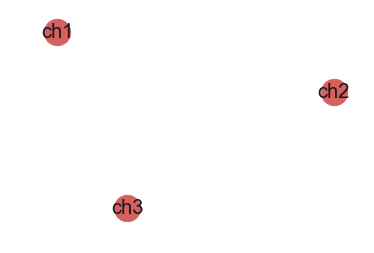

In [145]:
for item in median_type_data.keys():
    make_graph(median_type_data[item])

### 1.4.2 均值网络

In [146]:
# 读取结果
with open(data_root / r'WGCI_mean_type_persons.pkl' , 'rb') as instream:
    mean_type_data = pickle.load(instream)

In [147]:
mean_type_data

{'low': array([[0.        , 0.02517278, 0.01751431],
        [0.19557033, 0.        , 0.01903556],
        [0.01455476, 0.00650676, 0.        ]]),
 'mid': array([[0.        , 0.05236047, 0.02536776],
        [0.11197392, 0.        , 0.02112863],
        [0.00863801, 0.00226834, 0.        ]]),
 'high': array([[0.        , 0.09696098, 0.01710647],
        [0.09481322, 0.        , 0.01661258],
        [0.00141772, 0.0098298 , 0.        ]])}

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The

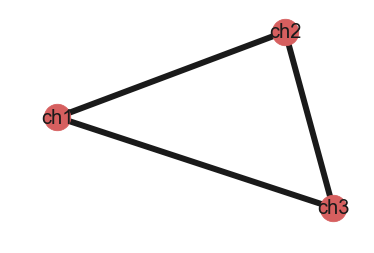

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: Ma

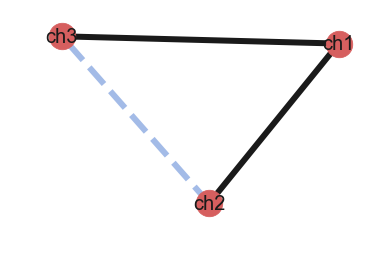

D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
D:\Softwares\MiniConda\envs\torch36\lib\site-packages\networkx\drawing\nx_pylab.py:724: Ma

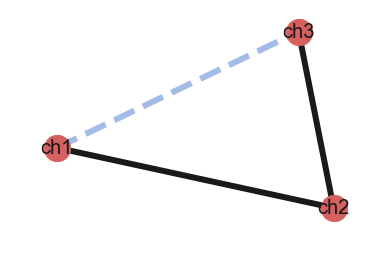

In [148]:
for item in mean_type_data.keys():
    make_graph(mean_type_data[item])